In [4]:
## import required libraries
%matplotlib inline
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import optim
#import pandas as pd
import numpy as np

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to C:\Users\pgsin/.cache\torch\hub\v0.9.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\pgsin/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

0.7%Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz
100.0%
Extracting C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw
100.6%Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw

4.4%Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz to C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz
100.0%
Extracting C:\Users\pgsin/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\pgsin/.pytorch/F_MNIST_dat

In [10]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [11]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

C:\Users\pgsin\anaconda3\envs\deeplearner\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


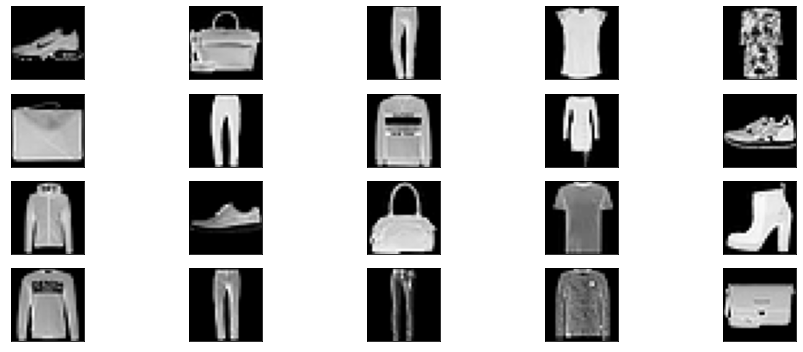

In [13]:
dataiter = iter(trainloader)
print(dataiter)
images, labels = dataiter.next()

fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
    ax = fig.add_subplot(4, 20/4 , idx + 1 , xticks=[], yticks = [])
    ax.imshow(np.squeeze(images[idx]), cmap = 'gray')
    fig.tight_layout()